In [1]:
import numpy as np
import matplotlib.pyplot as plt

#True params
m_true = -0.9594
b_true = 4.294
f_true = 0.534
#synthetic data
N = 50
x = np.sort(10*np.random.rand(N))

yerr = 0.1+0.5*np.random.rand(N)

y = m_true*x+b_true
g = m_true*x+b_true

y += np.abs(f_true*y) * np.random.randn(N)
y += yerr * np.random.randn(N)



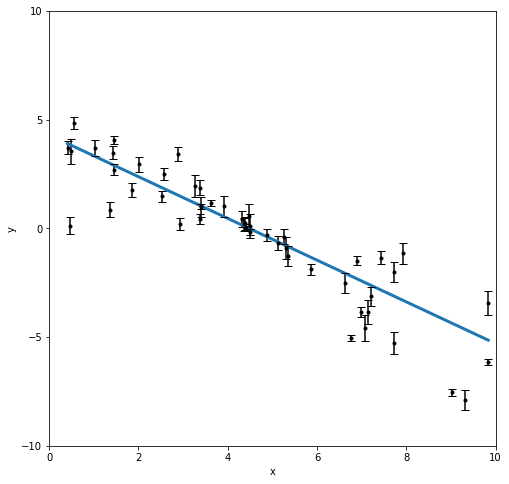

In [2]:
plt.figure(figsize=(8,8))
plt.plot(x, g, linewidth=3)
plt.errorbar(x, y, yerr = yerr, marker='.', linestyle=' ',\
             capsize=4, color='k')


plt.xlim(0,10);
plt.ylim(-10, 10);
plt.ylabel('y');
plt.xlabel('x');
plt.yticks([-10,-5,0,5,10]);


In [3]:
A = np.vstack((np.ones_like(x), x)).T
print("A=",A)
C = np.diag(yerr * yerr)
print('C=',C)
cov= np.linalg.inv(np.dot(A.T, np.linalg.solve(C, A)))
print('cov =', cov)
#print('bov =', bov)
b_ls, m_ls = np.dot(cov, np.dot(A.T, np.linalg.solve(C, y)))

gnew = x*m_ls + b_ls


A= [[1.         0.41054967]
 [1.         0.46626161]
 [1.         0.48861446]
 [1.         0.56232387]
 [1.         1.02902325]
 [1.         1.36146552]
 [1.         1.42472344]
 [1.         1.44712895]
 [1.         1.45074493]
 [1.         1.86203176]
 [1.         2.00547054]
 [1.         2.53092388]
 [1.         2.57870806]
 [1.         2.87985153]
 [1.         2.9385929 ]
 [1.         3.26847409]
 [1.         3.3723375 ]
 [1.         3.38348507]
 [1.         3.38970424]
 [1.         3.39948103]
 [1.         3.6232478 ]
 [1.         3.91589273]
 [1.         4.30783073]
 [1.         4.36125107]
 [1.         4.38429756]
 [1.         4.4141711 ]
 [1.         4.47791894]
 [1.         4.48913295]
 [1.         4.50446977]
 [1.         4.87455064]
 [1.         5.13427565]
 [1.         5.26583168]
 [1.         5.2987316 ]
 [1.         5.34313807]
 [1.         5.87236478]
 [1.         6.61950974]
 [1.         6.75862145]
 [1.         6.89180888]
 [1.         6.97600676]
 [1.         7.0644367

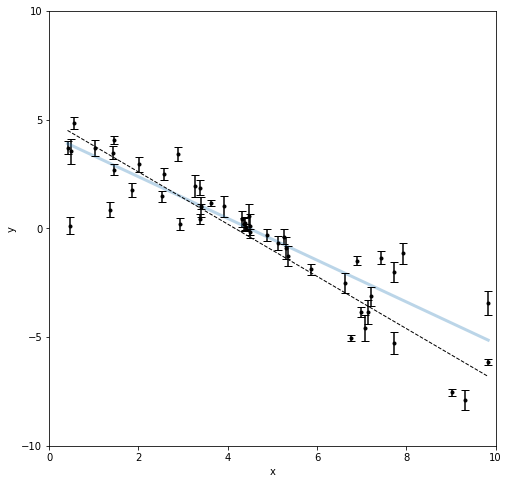

In [4]:
plt.figure(figsize=(8,8))
plt.plot(x, g, linewidth=3, alpha = 0.3)
plt.plot(x, gnew, linewidth=1, linestyle='--', color='k')
plt.errorbar(x, y, yerr = yerr, marker='.', linestyle=' ',\
             capsize=4, color='k')


plt.xlim(0,10);
plt.ylim(-10, 10);
plt.ylabel('y');
plt.xlabel('x');
plt.yticks([-10,-5,0,5,10]);

In [5]:
def lnlike(theta, x, y, yerr):
    m, b, lnf = theta
    model = m * x + b
    inv_sigma2 = 1.0/(yerr**2 + model**2*np.exp(2*lnf))
    return -0.5*(np.sum((y-model)**2*inv_sigma2 - np.log(inv_sigma2)))

import scipy.optimize as op
nll = lambda *args: -lnlike(*args)
result = op.minimize(nll, [m_true, b_true, np.log(f_true)], args=(x, y, yerr))
m_ml, b_ml, lnf_ml = result["x"]

glikely = x*m_ml + b_ml;



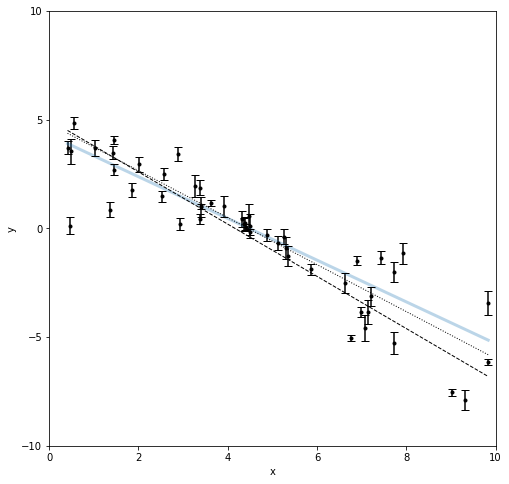

In [6]:
plt.figure(figsize=(8,8))
plt.plot(x, g, linewidth=3, alpha = 0.3)
plt.plot(x, gnew, linewidth=1, linestyle='--', color='k')
plt.plot(x, glikely, linewidth=1, linestyle=':', color='k')
plt.errorbar(x, y, yerr = yerr, marker='.', linestyle=' ',\
             capsize=4, color='k')


plt.xlim(0,10);
plt.ylim(-10, 10);
plt.ylabel('y');
plt.xlabel('x');
plt.yticks([-10,-5,0,5,10]);

In [7]:
def lnprior(theta):
    m, b, lnf = theta
    if -5.0 < m < 0.5 and 0.0 < b < 10.0 and -10.0 < lnf < 1.0:
        return 0.0
    return -np.inf


def lnprob(theta, x, y, yerr):
    lp = lnprior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + lnlike(theta, x, y, yerr)



In [8]:
%time
ndim, nwalkers = 3, 100
pos = [result["x"] + 1e-4*np.random.randn(ndim) for i in range(nwalkers)]

import emcee
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=(x, y, yerr))
sampler.run_mcmc(pos, 500);


CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 5.01 µs


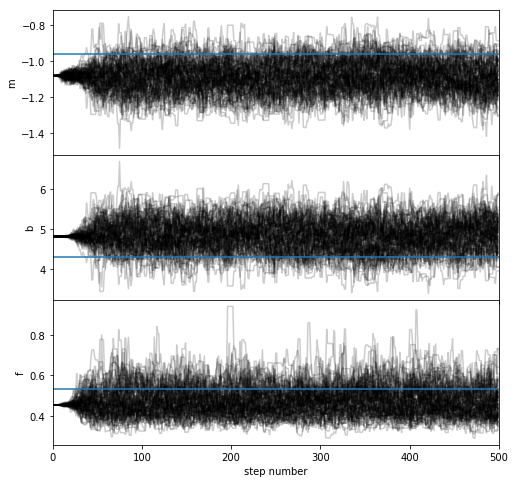

In [9]:
sampler.chain[:,:,0]
fig, ax = plt.subplots(3,1, figsize=(8,8))
for i in range(100):
    ax[0].plot(np.arange(0,500).T,sampler.chain[i,:,0],\
               color='k', alpha=0.2)
for i in range(100):
    ax[1].plot(np.arange(0,500).T,sampler.chain[i,:,1],\
               color='k', alpha=0.2)
for i in range(100):
    ax[2].plot(np.arange(0,500).T,np.e**sampler.chain[i,:,2],\
               color='k', alpha=0.2)

ax[0].axhline(y=-0.9594)
ax[1].axhline(y=4.294)
ax[2].axhline(y=0.534)
ax[0].set_ylabel("m")
ax[1].set_ylabel("b")
ax[2].set_ylabel("f")

ax[0].set_xlim(0,500)
ax[1].set_xlim(0,500)
ax[2].set_xlim(0,500)

ax[2].set_xlabel("step number")
ax[0].tick_params(labelbottom=False)
ax[1].tick_params(labelbottom=False)
plt.subplots_adjust(hspace = 0)

In [10]:
samples = sampler.chain[:, 50:, :].reshape((-1, ndim))
samples

array([[-1.05582317,  4.71849485, -0.81944814],
       [-1.05582317,  4.71849485, -0.81944814],
       [-1.05582317,  4.71849485, -0.81944814],
       ...,
       [-1.24151188,  5.72495239, -0.7272664 ],
       [-1.26902537,  5.86917903, -0.75400438],
       [-1.26902537,  5.86917903, -0.75400438]])

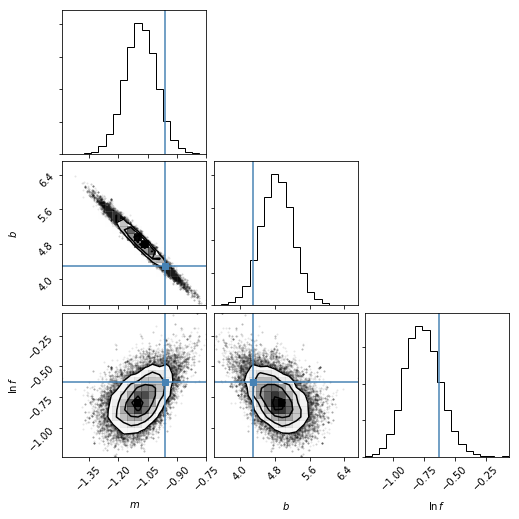

In [11]:
import corner 
fig = corner.corner(samples, labels=["$m$", "$b$", "$\ln\,f$"],
                      truths=[m_true, b_true, np.log(f_true)])
#fig.savefig("triangle.png")

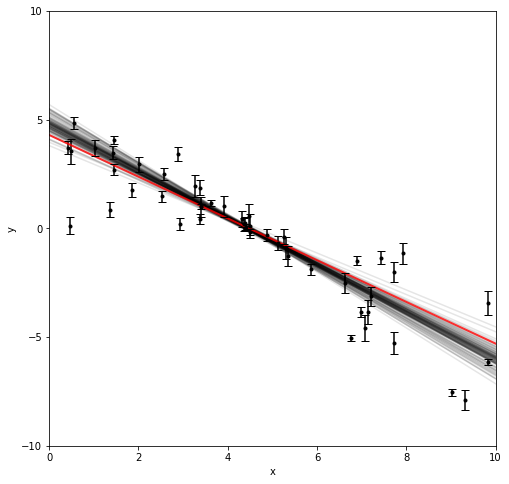

In [18]:
import matplotlib.pyplot as plt
xl = np.array([0, 10])

plt.figure(figsize=(8,8))
for m, b, lnf in samples[np.random.randint(len(samples), size=100)]:
    plt.plot(xl, m*xl+b, color="k", alpha=0.1)
plt.plot(xl, m_true*xl+b_true, color="r", lw=2, alpha=0.8)
plt.errorbar(x, y, yerr=yerr, fmt=".k", capsize=4)

plt.xlim(0,10);
plt.ylim(-10, 10);
plt.ylabel('y');
plt.xlabel('x');
plt.yticks([-10,-5,0,5,10]);

In [15]:
samples[:, 2] = np.exp(samples[:, 2])
m_mcmc, b_mcmc, f_mcmc = map(lambda v: (v[1], v[2]-v[1], v[1]-v[0]),
                             zip(*np.percentile(samples, [16, 50, 84],
                                                axis=0)))
print(m_mcmc)
print(b_mcmc)
print(f_mcmc)

(-1.0866038183700462, 0.08121633697967412, 0.08137730315468383)
(4.840051006549068, 0.3622077600773075, 0.3696970485698081)
(1.590126820152015, 0.12199550217047128, 0.09015902616236726)


In [14]:
print("m = ", m_mcmc[0])
print("b = ", b_mcmc[0])
print("f = ", f_mcmc[0])


m =  -1.0866038183700462
b =  4.840051006549068
f =  0.46381377415171765


$m = -1.087^{+0.081}_{-0.081}$, 
$b = 4.840^{+0.362}_{-0.370}$, 
$f = 0.464^{+0.122}_{-0.090}$

(Jeigu leisiu iš naujo vertės pasikeis)